In [1]:
import numpy as np
from scipy.linalg import solve

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

L = 20.0 # Length of the box
T = 20.0 # Total simulation time
dx = 0.1 # grid spacing
dt = 0.1 # time step
x0 = 0.0  # Initial position of the Gaussian wave packet

sigma = 1.0  # Width of the Gaussian wave packet
k0 = 10.0  # Wave number of the Gaussian wave packet

# Initial wave function
def psi0(L, sigma, k0, N, x0):
    A = 1.0 / (2.0 * np.pi * sigma**2)**0.25
    x = np.linspace(-L/2, L/2, N)
    return A * np.exp(-(x - x0)**2 / (4 * sigma**2)) * np.exp(1j * k0 * (x - x0))

# infinite square well potential
def potential(N, step):
    V = np.zeros(N)
    V[0] = V[-1] = 1e10
    # Add a step potential
    if step:
        V[int(3*N/4):int(3*N/4)+2] = 8
    return V

# Construct Hamiltonian matrix
def H_matrix(N, dx):
    H = np.zeros((N, N), dtype=np.complex128)
    H += 2.0 / dx**2 * np.diag(np.ones(N))
    H += -1.0 / dx**2 * np.diag(np.ones(N-1), k=1)
    H += -1.0 / dx**2 * np.diag(np.ones(N-1), k=-1)
    return H

# Crank-Nicolson algorithm
def crank_nicolson(H, V, N, dt, psi):    
    A = np.eye(N) + 0.5j * dt * H + 0.5j * dt * np.diag(V)
    b = np.dot(np.eye(N) - 0.5j * dt * H - 0.5j * dt * np.diag(V), psi)
    return solve(A, b)

# Propagate the wave function
def time_evolution(dx, dt, T, L, sigma, k0, x0, step=False):
    N = int(L/dx) + 1
    H = H_matrix(N, dx)
    V = potential(N, step)
    psi = psi0(L, sigma, k0, N, x0)
    Psi = []
    t = 0.0
    while t < T:
        Psi.append((t, psi))
        psi = crank_nicolson(H, V, N, dt, psi)
        t += dt
    return Psi

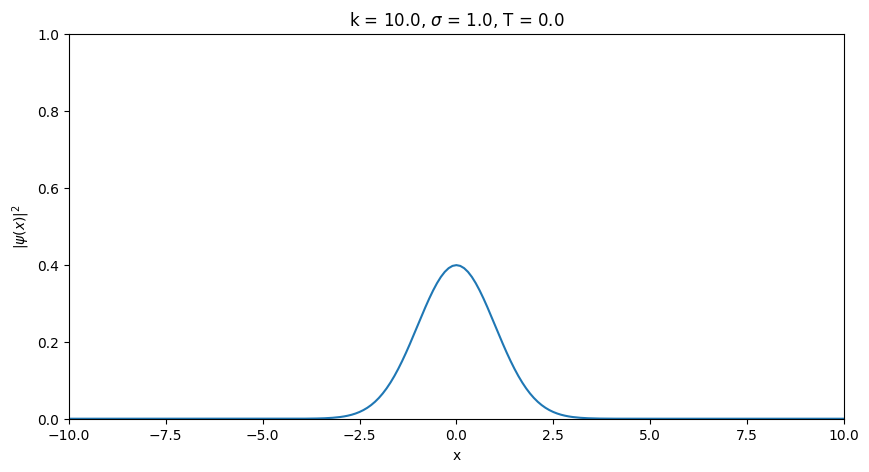

In [2]:
Psi = time_evolution(dx, dt, T, L, sigma, k0, x0)

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    fig.set_size_inches(10, 5)
    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(0, 1)
    ax.plot(np.linspace(-L/2, L/2, int(L/dx) + 1), np.abs(Psi[i][1])**2)
    ax.set_xlabel('x')
    ax.set_ylabel('$|\psi(x)|^2$')
    
    ax.set_title('k = %.1f, $\sigma$ = %.1f, T = %.1f' % (k0, sigma, Psi[i][0]))

ani = FuncAnimation(fig, animate, frames=len(Psi), interval=dt)
# Save animation as a GIF file
ani.save('ex3_1.gif', writer='pillow')

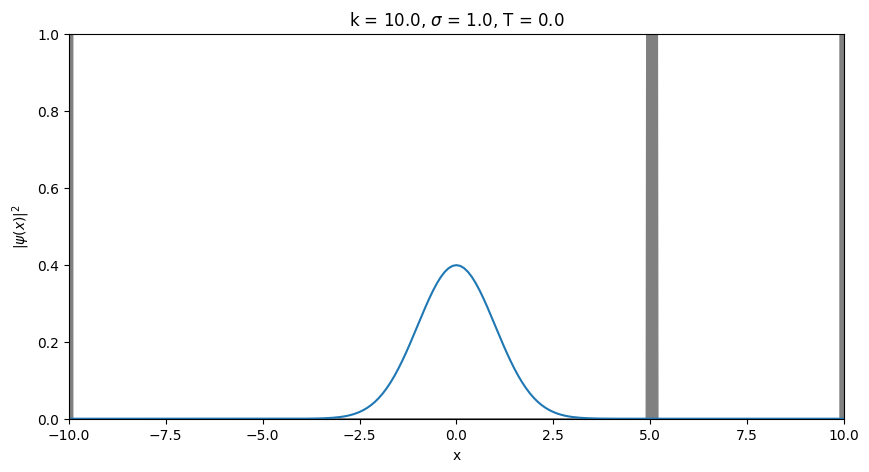

In [3]:
Psi = time_evolution(dx, dt, T, L, sigma, k0, x0, step=True)

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    fig.set_size_inches(10, 5)
    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(0, 1)
    ax.plot(np.linspace(-L/2, L/2, int(L/dx) + 1), np.abs(Psi[i][1])**2)
    # Plot the potential
    ax.fill_between(np.linspace(-L/2, L/2, int(L/dx) + 1), 0, potential(int(L/dx) + 1, step=True), color='gray')
    ax.set_xlabel('x')
    ax.set_ylabel('$|\psi(x)|^2$')
    ax.set_title('k = %.1f, $\sigma$ = %.1f, T = %.1f' % (k0, sigma, Psi[i][0]))

ani = FuncAnimation(fig, animate, frames=len(Psi), interval=dt)
# Save animation as a GIF file
ani.save('ex3_2.gif', writer='pillow')

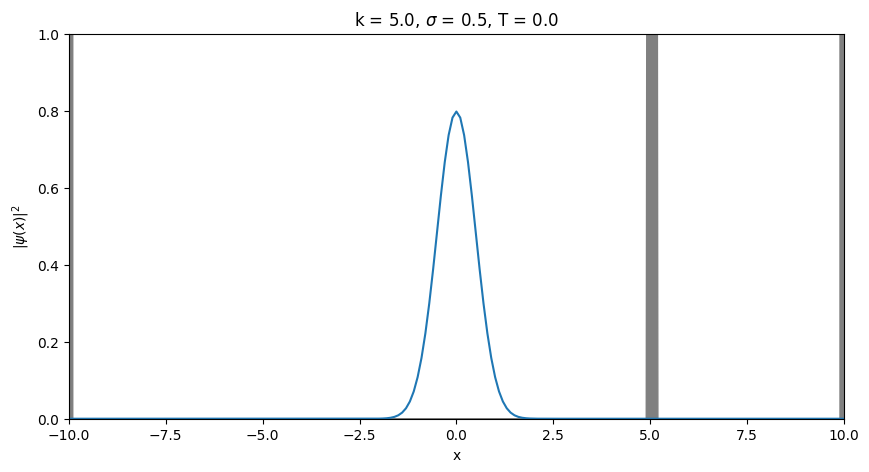

In [5]:
k0 = 5.0
sigma = 0.5
Psi = time_evolution(dx, dt, T, L, sigma, k0, x0, step=True)

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    fig.set_size_inches(10, 5)
    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(0, 1)
    ax.plot(np.linspace(-L/2, L/2, int(L/dx) + 1), np.abs(Psi[i][1])**2)
    # Plot the potential
    ax.fill_between(np.linspace(-L/2, L/2, int(L/dx) + 1), 0, potential(int(L/dx) + 1, step=True), color='gray')
    ax.set_xlabel('x')
    ax.set_ylabel('$|\psi(x)|^2$')
    ax.set_title('k = %.1f, $\sigma$ = %.1f, T = %.1f' % (k0, sigma, Psi[i][0]))

ani = FuncAnimation(fig, animate, frames=len(Psi), interval=dt)
# Save animation as a GIF file
ani.save('ex3_3.gif', writer='pillow')